In [301]:
%matplotlib inline

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
from matplotlib.pyplot import style

Initial question of this project was : What makes us sick?. And the more general one: How does the environment we live in influence our health?
In the quest to explore the given data and some other sources the thinking behind the following lines of code and analyses changed. The first idea was to make a 60 year span exploration for the Balkan penisuila but for different reasons the scope is only from 1990 -2010. Maybe on later date as I am intrested what will data shows for the years before and after the iron curtain fell.
But the main thesis of this work will be : We are human so nature make us sick and our weaknesses,but our actions either protect or make us more vulnerable.
In the exploration the following countries will be used: Serbia as Srb, Turkey as T,Macedonia as M,Romania as R Greece as G and Bulgaria as Bg. So now lets start with data and see where it lead us.

In [3]:
 # now we will read some dfs first we will open the 3 industrial related given dfs,make some actions with them mainly making them
# long with years as index and join them in one df and clean them,leaving them with only the countries we are interested in.
#gdp=pd.read_excel("exam/gdp_per_capita.xlsx")
#gdp=gdp[(gdp['country'].str.contains("Turkey"))
 #       | (gdp['country'].str.contains("Serbia") == True)
  #      | (gdp['country'].str.contains("Bulgaria") == True)
   #     | (gdp['country'].str.contains("Greece") == True)
    #    | (gdp['country'].str.contains("Turkey") == True)
     #   | (gdp['country'].str.contains("Macedonia") == True)]
#gdp=gdp.drop(gdp.index[[4,5]])

#gdp.rename(columns={'value': 'gdp_per','variable':'year'}, inplace=True)
#df=pd.pivot_table(gdp,index="year",columns={"GDP per capita":"country"},values="gdp_per")
#df=gdp.astype(np.int32)
#gdp.drop(gdp[gdp.year <1990].index, inplace=True)
#gdp.rename(columns={'Macedonia, FYR': 'Macedonia'}, inplace=True)
#df.reset_index(level='year')

In [4]:
#g2['year']=pd.to_datetime(g2['year'], format='%Y%', errors='ignore')
#g2[g2.columns[1]]=g2[g2.columns[1]].astype('int')
#g2[g2.columns[2]]=g2[g2.columns[2]].astype('int')
#g2= g2.drop(g2[g2.year <1990].index)
#g2.reset_index(drop=True)

In [303]:
def df_load_and_clear(dataframe ,string):
    df=dataframe.rename(columns={'value':dataframe.columns[0],dataframe.columns[0]:'country'})
    df=pd.melt(df,id_vars=['country'],var_name='year', value_name=name[:len(name)])
    df1=df[(df['country'].str.contains("Turkey"))
        | (df['country'].str.contains("Serbia") == True)
        | (df['country'].str.contains("Bulgaria") == True)
        | (df['country'].str.contains("Greece") == True)
        | (df['country'].str.contains("Turkey") == True)
        | (df['country'].str.contains("Macedonia") == True)]
    df1 =df1.loc[~df1['country'].isin(['Serbia excluding Kosovo','Serbia and Montenegro'])]
    df1['year'] =df1['year'].astype('int',errors='ignore')
    df1[df1.columns[2]]=df1[df1.columns[2]].astype('float',errors='ignore').round(2)
    df1=df1.drop(df1[df1.year <1995].index)
    df1=df1.drop(df1[df1.year >2010].index)
    return df1

In [304]:
name=os.path.splitext('urban_population_pct')[0]
df=(pd.read_excel("exam/urban_population_pct.xlsx",na_values=0))
urban_population= df_load_and_clear(df,name)


In [305]:
name=os.path.splitext('gdp_per_capita.xlsx')[0]
df=(pd.read_excel("exam/gdp_per_capita.xlsx",na_values=0))
gdp= df_load_and_clear(df,name)


In [306]:
name=os.path.splitext('life_expectancy_at_birth')[0]
df=(pd.read_excel("exam/life_expectancy_at_birth.xlsx",na_values=0))
lifeatbirth= df_load_and_clear(df,name)


In [307]:
name=os.path.splitext('under_five_mortality_rate')[0]
df=(pd.read_excel("exam/under_five_mortality_rate.xlsx",na_values=0))
under_five_mortality= df_load_and_clear(df,name)


In [308]:
name=os.path.splitext('total_health_expenditure_gdp_pct')[0]
df=(pd.read_excel("exam/total_health_expenditure_gdp_pct.xlsx",na_values=0))
total_health_expenditure=df_load_and_clear(df,name)


In [309]:
def merge_data_country(dataframe, dataframe2):
    #result =pd.merge(dataframe,dataframe,  how='left', left_on=['country','year'], right_on = ['country','year'])
    result=pd.merge(dataframe,dataframe2, on=['country','year'])
    return result

In [311]:
overall_table= merge_data_country(gdp,total_health_expenditure)
overall_table=merge_data_country(overall_table,urban_population)
overall_table=merge_data_country(overall_table,under_five_mortality)
overall_table=merge_data_country(overall_table,lifeatbirth)
overall_table['gdp_per_capita'] =overall_table['gdp_per_capita'].astype(np.int)
overall_table.reset_index(drop=True)
overall_table.set_index('year')

,country,gdp_per_capita,total_health_expenditure_gdp_pct,urban_population_pct,under_five_mortality_rate,life_expectancy_at_birth
year,,,,,,
1995,Bulgaria,8479,5.23,67.78,22.9,71.0
1995,Greece,21426,8.59,59.29,10.1,77.8
1995,"Macedonia, FYR",7700,8.52,59.72,24.5,71.8
1995,Serbia,7167,7.32,51.75,19.0,72.0
1995,Turkey,11530,2.51,62.12,52.7,70.0
1996,Bulgaria,8659,4.67,68.01,22.7,70.9
1996,Greece,21905,8.55,59.38,9.7,77.9
1996,"Macedonia, FYR",7759,8.75,59.65,22.4,72.1
1996,Serbia,7348,7.32,52.00,17.4,71.9


In [94]:
overall_table.describe()

,year,gdp_per_capita,total_health_expenditure_gdp_pct,urban_population_pct,under_five_mortality_rate,life_expectancy_at_birth
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2002.500000,14174.562500,7.527000,61.788750,16.672500,74.426250
std,4.638856,7174.786447,1.878584,5.777028,10.047885,2.936576
min,1995.000000,7161.000000,2.510000,51.750000,4.600000,70.000000
25%,1998.750000,8708.500000,6.600000,59.135000,9.575000,72.100000
50%,2002.500000,11969.500000,7.500000,60.025000,14.650000,73.550000
75%,2006.250000,15603.500000,8.802500,67.622500,20.625000,76.875000
max,2010.000000,32408.000000,10.570000,72.520000,52.700000,80.400000


In [312]:
Bg =overall_table.loc[overall_table.country == "Bulgaria"]


In [313]:
Bg=overall_table.groupby("country").get_group("Bulgaria")
#bgg.set_index('year')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


(1995, 2010)

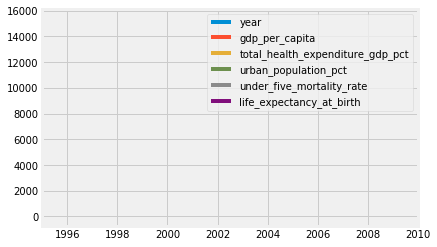

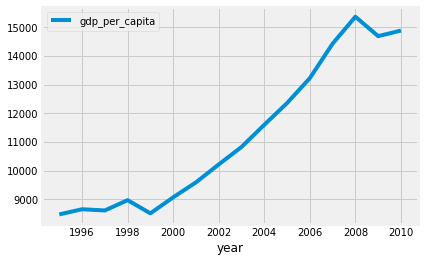

In [317]:

fte_graph=bgg.plot(x=Bg.index,y=list(Bg.columns))
fte_graph.add_line=Bg.plot(x='year', y='gdp_per_capita')
fte_graph.tick_params(axis = 'both', which = 'all', labelsize = 10)
fte_graph.xaxis.label.set_visible(False)
fte_graph.set_xlim(left = 1995, right = 2010)


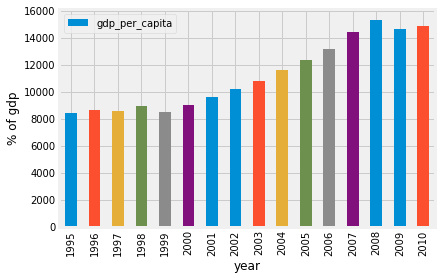

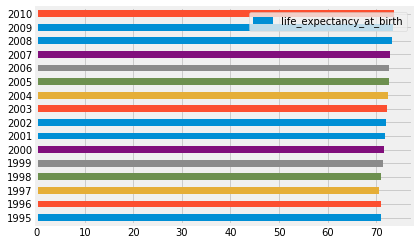

In [318]:
#bgg.gdp_per_capita.plot.bar(bgg.set)
f=bgg.gdp_per_capita.plot(kind='bar')
f.set_xticklabels( bgg.year.values )
f.legend()
f.set_xlabel("year")
f.set_ylabel("% of gdp")
plt.show()
g=bgg.life_expectancy_at_birth.plot(kind='barh')
g.set_yticklabels(bgg.year.values)
g.legend()
plt.show()

In [145]:
fig = plt.figure(figsize=(20,10))

f=bgg.gdp_per_capita.plot(kind='bar',ax=axes[0,0])
f.set_yticks(bgg.gdp_per_capita.values)
f.set_xticklabels( bgg.year.values )
f.legend()
f.set_xlabel("year")
f.set_ylabel("% of gdp")
g=bgg.life_expectancy_at_birth.plot(kind='barh',ax=axes[0,1])
g.set_yticklabels(bgg.year.values)
g.legend()
plt.show()

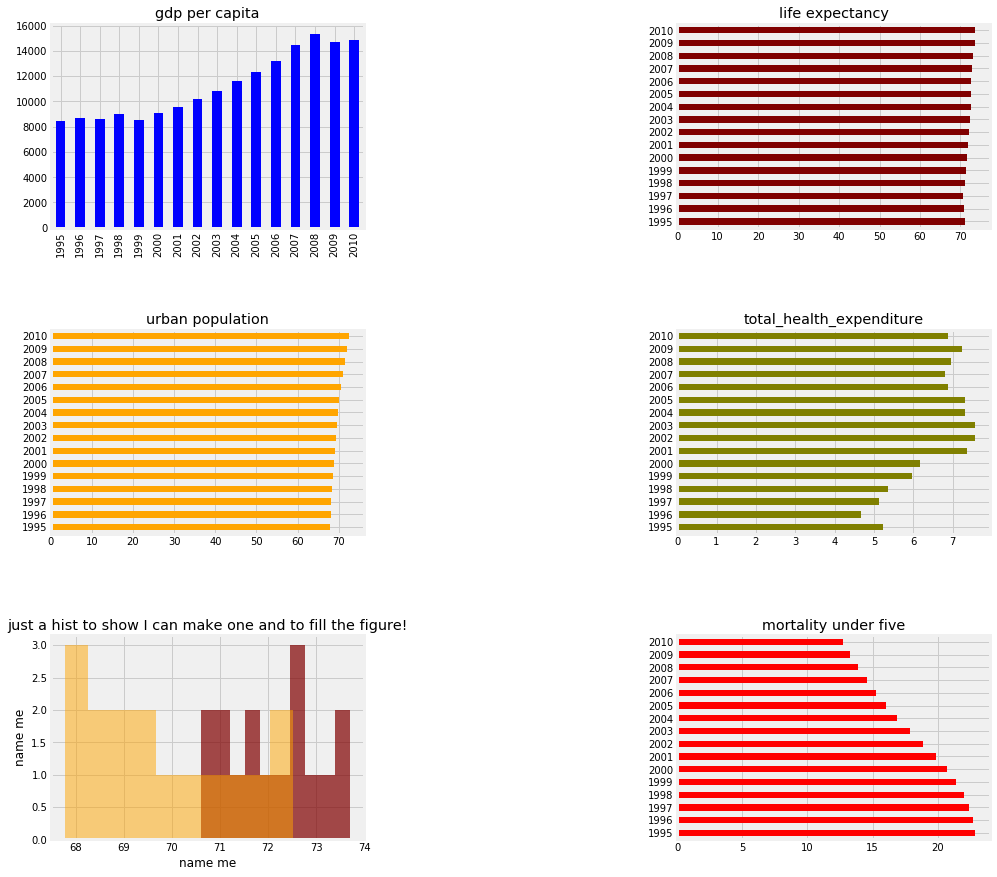

In [380]:
fig=plt.figure(figsize=(15,15))
ax1=plt.subplot2grid((6,2),(0,0), rowspan=2,colspan=1)
ax2=plt.subplot2grid((6,2),(0,1), rowspan=2,colspan=1)
ax3=plt.subplot2grid((6,2),(2,0), rowspan=2,colspan=1)
ax4=plt.subplot2grid((6,2),(2,1), rowspan=2,colspan=1)
ax5=plt.subplot2grid((6,2),(4,1), rowspan=2,colspan=1)
ax6=plt.subplot2grid((6,2),(4,0), rowspan=2,colspan=1)
ax1.tick_params(which = 'both', direction = 'out')
ax2.tick_params(which = 'both', direction = 'out')
ax3.tick_params(which = 'both', direction = 'out')
ax4.tick_params(which = 'both', direction = 'out')
ax5.tick_params(which = 'both', direction = 'out')
ax6.tick_params(which = 'both', direction = 'out')


fig.subplots_adjust(wspace=1,hspace=2)

gdp=bgg.gdp_per_capita.plot.bar(ax=ax1,title='gdp per capita',color='#0000FF')
gdp.set_xticklabels( bgg.year.values )

leab=bgg.life_expectancy_at_birth.plot(kind='barh',ax=ax2,title='life expectancy',color='#800000')
leab.set_yticklabels(bgg.year.values)

ub=bgg.urban_population_pct.plot(kind='barh',ax=ax3,title='urban population',color='#FFA500')
ub.set_yticklabels( bgg.year.values )

the=bgg.total_health_expenditure_gdp_pct.plot(kind='barh',ax=ax4,title='total_health_expenditure',color='#808000')
the.set_yticklabels( bgg.year.values )

fmr=bgg.under_five_mortality_rate.plot(kind='barh',ax=ax5,title='mortality under five',color='#FF0000')
fmr.set_yticklabels( bgg.year.values )


plt.hist(bgg.life_expectancy_at_birth,alpha=0.7,color='#800000')
plt.hist(bgg.urban_population_pct,alpha=0.5,color='#FFA500')
plt.title('just a hist to show I can make one and to fill the figure!')
plt.ylabel('name me!')
plt.xlabel('name me!')

plt.show()

In [522]:
names=list(bgg.columns)
names.remove('country')
names.remove('year')
names.index('gdp_per_capita')
names

['gdp_per_capita',
 'total_health_expenditure_gdp_pct',
 'urban_population_pct',
 'under_five_mortality_rate',
 'life_expectancy_at_birth']

In [480]:
def plot_dataframe_columns(dataframe):
    df=dataframe
    names=list(df.columns)
    colors=['#0000FF','#800000','#FFA500','#808000','#FF0000']
    for index, item in enumerate(names):
     

0
1
2
3
4
5
6


In [518]:
def plot_dataframe_columns(dataframe):
    df=dataframe
    names=list(df.columns)
    colors=['#0000FF','#800000','#FFA500','#808000','#FF0000']
    fig=plt.figure(figsize=(15,15))
    ax0=plt.subplot2grid((6,2),(0,0), rowspan=2,colspan=1)
    ax1=plt.subplot2grid((6,2),(0,1), rowspan=2,colspan=1)
    ax2=plt.subplot2grid((6,2),(2,0), rowspan=2,colspan=1)
    ax3=plt.subplot2grid((6,2),(2,1), rowspan=2,colspan=1)
    ax4=plt.subplot2grid((6,2),(4,1), rowspan=2,colspan=1)
    ax5=plt.subplot2grid((6,2),(4,0), rowspan=2,colspan=1)
    ax0.tick_params(which = 'both', direction = 'out')
    ax1.tick_params(which = 'both', direction = 'out')
    ax2.tick_params(which = 'both', direction = 'out')
    ax3.tick_params(which = 'both', direction = 'out')
    ax4.tick_params(which = 'both', direction = 'out')
    ax5.tick_params(which = 'both', direction = 'out')
    fig.subplots_adjust(wspace=1,hspace=2)

    for index, item in enumerate(names):
        a=index
        b=item
        ##df[b].plot.bar(ax=ax('a'),title=item,color=colors[a])
        plt.hist(df[name])


        plt.hist(dataframe.life_expectancy_at_birth,alpha=0.7,color='#800000')
        plt.hist(dataframe.urban_population_pct,alpha=0.5,color='#FFA500')
        plt.title('just a hist to show I can make one and to fill the figure!')
        plt.ylabel('name me!')
        plt.xlabel('name me!')
        plt.show()
 

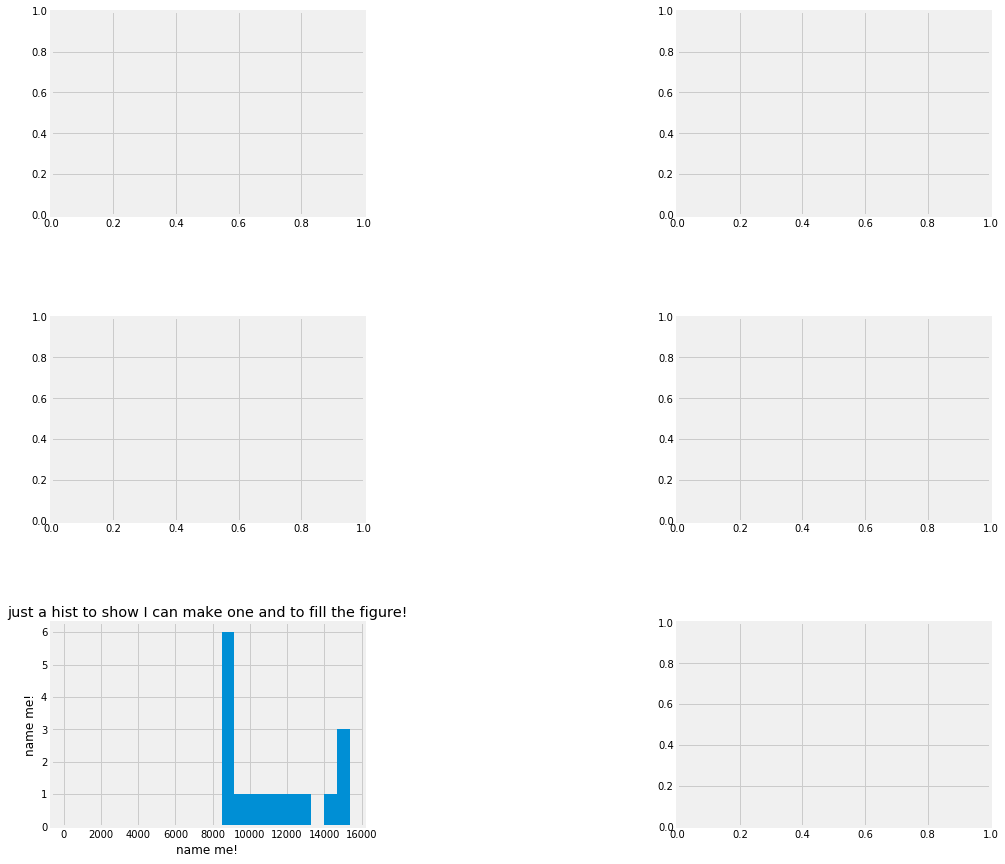

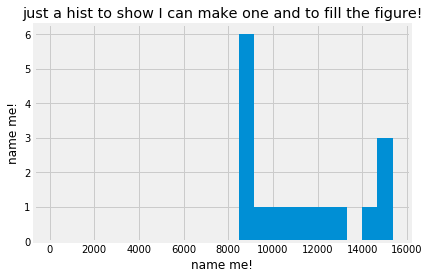

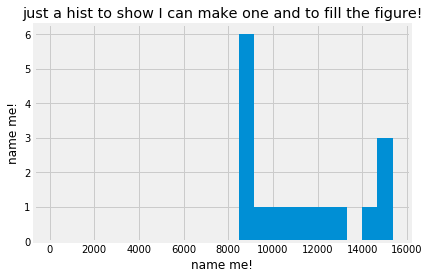

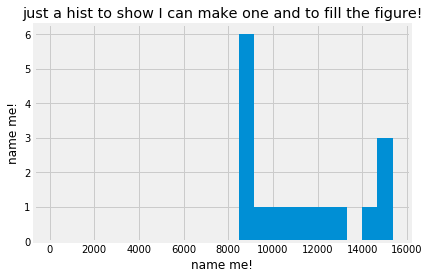

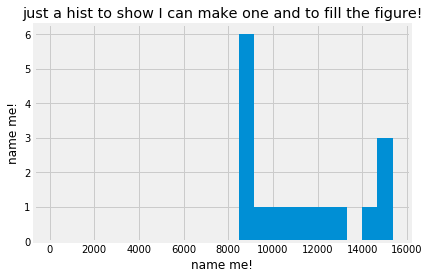

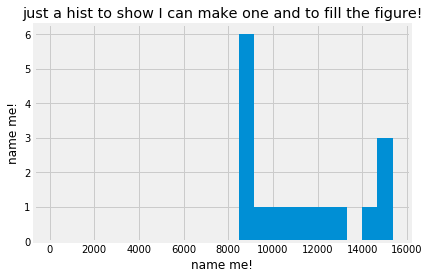

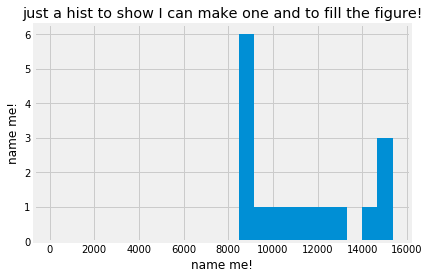

In [519]:
plot_dataframe_columns(bgg)

In [ ]:
gdp=bgg.gdp_per_capita.plot.bar(ax=ax1,title='gdp per capita',color='#0000FF')
gdp.set_xticklabels( bgg.year.values )

leab=bgg.life_expectancy_at_birth.plot(kind='barh',ax=ax2,title='life expectancy',color='#800000')
leab.set_yticklabels(bgg.year.values)

ub=bgg.urban_population_pct.plot(kind='barh',ax=ax3,title='urban population',color='#FFA500')
ub.set_yticklabels( bgg.year.values )

the=bgg.total_health_expenditure_gdp_pct.plot(kind='barh',ax=ax4,title='total_health_expenditure',color='#808000')
the.set_yticklabels( bgg.year.values )

fmr=bgg.under_five_mortality_rate.plot(kind='barh',ax=ax5,title='mortality under five',color='#FF0000')
fmr.set_yticklabels( bgg.year.values )


In [488]:
bgfg=plot_dataframe_columns(bgg)
bgfg  

0
1
2
3
4
5
6


In [767]:
name=os.path.splitext('bmi_female')[0]
fbmi=(pd.read_excel("exam/bmi_female.xlsx",na_values=0))

In [754]:
def df_load_and_clear_modified(dataframe,string):
    dataframe.reset_index(level=0,inplace=True)
    df=dataframe.rename(columns={dataframe.columns[0]:'country'})
    df=pd.melt(df,id_vars=['country'],var_name='year', value_name=name[:len(name)])
    df1=df[(df['country'].str.contains("Turkey"))
        | (df['country'].str.contains("Serbia") == True)
        | (df['country'].str.contains("Bulgaria") == True)
        | (df['country'].str.contains("Greece") == True)
        | (df['country'].str.contains("Turkey") == True)
        | (df['country'].str.contains("Macedonia") == True)]
    df1 =df1.loc[~df1['country'].isin(['Serbia excluding Kosovo','Serbia and Montenegro'])]
    df1['year'] =df1['year'].astype('int64',errors='ignore')
    df1=df1.drop(df1[df1.year <1995].index)
    df1=df1.drop(df1[df1.year >2010].index)
    return df1

In [731]:
gk=df_load_and_clear_modified(fd,name)